<a href="https://colab.research.google.com/github/suneelcs1615/DeepLearning/blob/main/Unit-02_Deep%20Neural%20Networks/Demonstration_of_Loss_Functions_in_Deep_Neural_Networks_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demonstration of Loss Functions in Deep Neural Networks Using TensorFlow
This notebook is an Open Educational Resource (OER) developed for teaching and learning purposes. It is released under the Creative Commons Attribution–ShareAlike (CC BY-SA 4.0) International License.

This license allows anyone to use, copy, adapt, modify, translate, remix, and redistribute the material in any medium or format, provided proper credit is given to the original author and any modified versions are shared under the same license.

---
*Citation Format: Suneel Kumar Duvvuri, Demonstration of Loss Functions in Deep Neural Networks Using TensorFlow. Open Educational Resource (OER). Licensed under CC BY-SA 4.0*

# Aim
To implement and compare different loss functions in deep neural networks and analyze their effect on model training and performance.
# Dataset Used

MNIST Handwritten Digits Dataset (TensorFlow built-in dataset)

### Step 1: Import Required Libraries
The first step involved importing the necessary libraries: `tensorflow` for building and training the neural network, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting. This sets up the environment for our deep learning task.

In [4]:
#Step 1: Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the MNIST Dataset
We loaded the MNIST handwritten digits dataset, which consists of 60,000 training images and 10,000 testing images. Each image is 28x28 grayscale.

The preprocessing steps included:
*   **Normalizing the pixel values:** Dividing by 255.0 to scale them between 0 and 1.
*   **Flattening the images:** Reshaping each 28x28 image into a 1D array of 784 pixels to be used as input for a dense neural network.

In [5]:
#Step 2: Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding for categorical crossentropy
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#Step 3: Define a Function to Create Model
A sequential deep neural network model was constructed using Keras. Key features of the model include:
*   **Dense layers:** Two hidden layers with 128 and 64 units, respectively, using the 'relu' activation function.

In [11]:
#Step 3: Define a Function to Create Model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

#Compile the Model
The model was compiled with the following configurations:

Optimizer: Adam optimizer, a popular choice for its efficiency and good performance.
Loss Function: `Mean Squared Error` was chosen

In [12]:
#Case 1: Using Mean Squared Error (MSE)
model_mse = create_model()
model_mse.compile(optimizer='adam',
                  loss='mse',
                  metrics=['accuracy'])

history_mse = model_mse.fit(x_train, y_train_cat,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8004 - loss: 0.0289 - val_accuracy: 0.9485 - val_loss: 0.0083
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9479 - loss: 0.0082 - val_accuracy: 0.9544 - val_loss: 0.0070
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9637 - loss: 0.0058 - val_accuracy: 0.9650 - val_loss: 0.0054
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9742 - loss: 0.0044 - val_accuracy: 0.9648 - val_loss: 0.0056
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9789 - loss: 0.0035 - val_accuracy: 0.9705 - val_loss: 0.0046
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0031 - val_accuracy: 0.9709 - val_loss: 0.0045
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9853 - loss: 0.0025 - val_accuracy: 0.9726 - val_loss: 0.0042
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9881 - loss: 0.0021 - val_accuracy: 0.

#Compile the Model
The model was compiled with the following configurations:

Optimizer: Adam optimizer, a popular choice for its efficiency and good performance.
Loss Function: `Categorical Cross Entropy` was chosen

In [13]:
#Case 2: Using Categorical Crossentropy
model_cce = create_model()
model_cce.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cce = model_cce.fit(x_train, y_train_cat,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7967 - loss: 0.7050 - val_accuracy: 0.9492 - val_loss: 0.1785
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9484 - loss: 0.1752 - val_accuracy: 0.9600 - val_loss: 0.1363
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9681 - loss: 0.1100 - val_accuracy: 0.9632 - val_loss: 0.1244
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9745 - loss: 0.0857 - val_accuracy: 0.9666 - val_loss: 0.1110
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0654 - val_accuracy: 0.9710 - val_loss: 0.1022
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9863 - loss: 0.0490 - val_accuracy: 0.9728 - val_loss: 0.0936
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9885 - loss: 0.0404 - val_accuracy: 0.9730 - val_loss: 0.0899
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9916 - loss: 0.0298 - val_accuracy: 0.

#Compile the Model
The model was compiled with the following configurations:

Optimizer: Adam optimizer, a popular choice for its efficiency and good performance.
Loss Function: `Sparse Categorical Cross Entropy` was chosen

In [14]:
#Case 3: Using Sparse Categorical Crossentropy
model_scce = create_model()
model_scce.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_scce = model_scce.fit(x_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.2,
                              verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7991 - loss: 0.6944 - val_accuracy: 0.9458 - val_loss: 0.1868
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9521 - loss: 0.1631 - val_accuracy: 0.9652 - val_loss: 0.1270
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9694 - loss: 0.1084 - val_accuracy: 0.9653 - val_loss: 0.1139
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9759 - loss: 0.0832 - val_accuracy: 0.9673 - val_loss: 0.1062
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9825 - loss: 0.0597 - val_accuracy: 0.9722 - val_loss: 0.0950
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9720 - val_loss: 0.0937
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9882 - loss: 0.0397 - val_accuracy: 0.9718 - val_loss: 0.0983
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9910 - loss: 0.0318 - val_accuracy: 0

#Evaluate Model Performance
After training, the model's performance was evaluated on the test dataset (x_test, y_test) to assess its generalization capability. The evaluate method returned the test loss and test accuracy.

In [16]:
#Step 4: Evaluate All Models
loss_mse, acc_mse = model_mse.evaluate(x_test, y_test_cat, verbose=0)
loss_cce, acc_cce = model_cce.evaluate(x_test, y_test_cat, verbose=0)
loss_scce, acc_scce = model_scce.evaluate(x_test, y_test, verbose=0)

print("MSE Test Accuracy:", acc_mse)
print("Categorical Crossentropy Test Accuracy:", acc_cce)
print("Sparse Categorical Crossentropy Test Accuracy:", acc_scce)

MSE Test Accuracy: 0.9764000177383423
Categorical Crossentropy Test Accuracy: 0.9747999906539917
Sparse Categorical Crossentropy Test Accuracy: 0.9750999808311462


# Plot Training and Validation Accuracy
Finally, the training and validation accuracy over epochs were plotted using matplotlib to visualize the all model's learning progress and identify potential loss function comparison

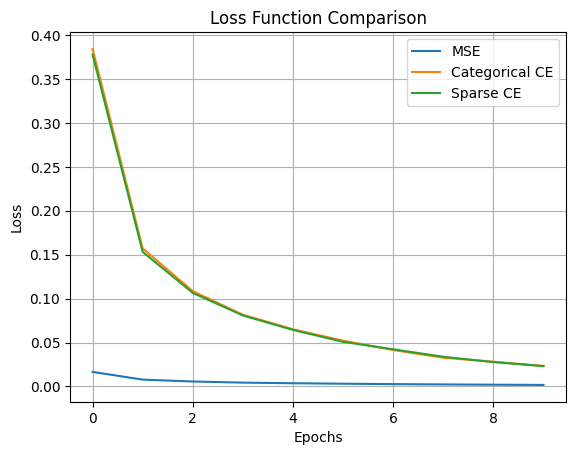

In [17]:
#Step 5: Plot Loss Curves Comparison
plt.figure()
plt.plot(history_mse.history['loss'], label='MSE')
plt.plot(history_cce.history['loss'], label='Categorical CE')
plt.plot(history_scce.history['loss'], label='Sparse CE')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Comparison")
plt.legend()
plt.grid(True)
plt.show()